## An Implementation of Prophet for Bitcoin Analysis

In this model, I will be implementing Facebook's Prophet library to use as time-series analysis for Bitcoin between January 1st, 2017 to December 28th, 2020, which is the most current pricing data that I am able to retrieve.

Facebook introduced their open source library, Prophet, as a forecasting tool which provides the ability to create better additive regression models through components such as trends, seasonalities, and holidays. It includes many different forecasting techniques such as ARIMA and exponential smoothing, as well as options to specify holidays, seasonal components, as well as trends.

The four main components are listed below (from Facebook Research directly):

- A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
- A yearly seasonal component modeled using Fourier series.
- A weekly seasonal component using dummy variables.
- A user-provided list of important holidays.

The time series model that is therefore created is: 

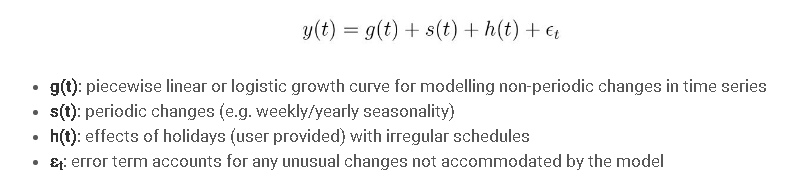

With time as a regressor, Prophet attempts to fit linear and nonlinear functions of time as components. In particular, modelling seasonality as an additive component is similar to how expontential smoothing is conducted in the Holt-Winters method. Prophet relies on fourier series to provide a flexible model, as shown below.

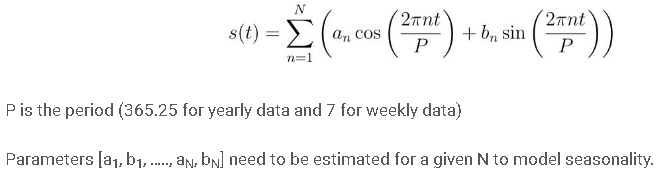

The fourier order N which defines whether high frequency changes are allowed to be modelled is an important parameter to set here. For a time series, if the user believes the high frequency components are just noise and should not be considered for modelling, he/she could set the values of N from to a lower value. If not, N can be tuned to a higher value and set using the forecast accuracy.

Holidays and events could also be provided as a custom list so that a window around these events is created and these windows are evaluated separately to avoid holiday effects.

Given the explanation of Prophet, it is now implemented to predict for Bitcoin price between January 1st, 2017 to December 28th, 2020. I will use Pandas, NumPy, Matplotlib, fbprophet, and some additional Python code.

I will first import the the libraries needed, as well as the .csv file (from Yahoo Finance). Then I will display a brief header of the data as well as a plot visualization of the entire dataset for daily closing prices (at 11:59pm) that will be used.

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,20

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv('BTC-USD (2015).csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


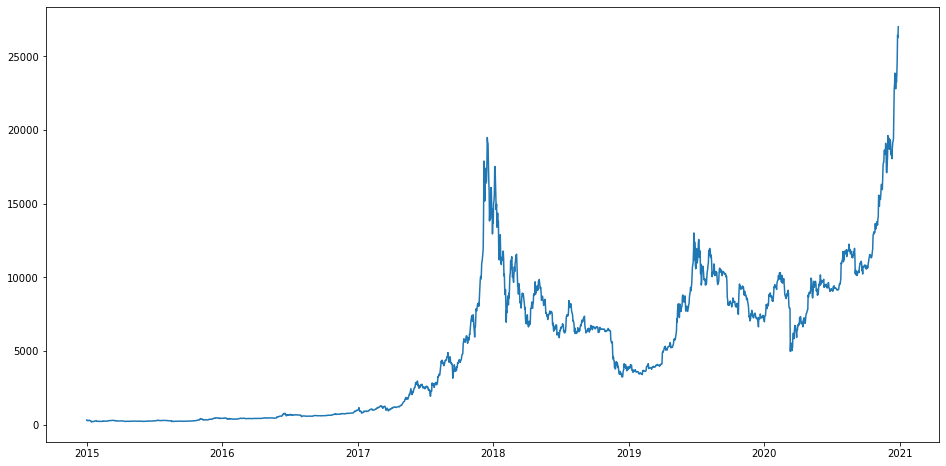

In [32]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

Now I need to rename and sort the data as Prophet only accepts two columns, one as the date, and the other as the daily closing prices. I will then train the data afterwards using the data before November 27th, 2019 and backtesting all the data after that period of time. I will also implement weekly seasonality as I predict that there are regular and predictable changes which occur every week.

In [33]:
#I need to reset the index so I just reimport it
df = pd.read_csv('BTC-USD (2017).csv')
df[['ds','y']] = df[['Date' ,'Adj Close']]
df = df[['ds','y']]
df.head()

,ds,y
0,2017-01-02,1021.750000
1,2017-01-03,1043.839966
2,2017-01-04,1154.729980
3,2017-01-05,1013.380005
4,2017-01-06,902.200989


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


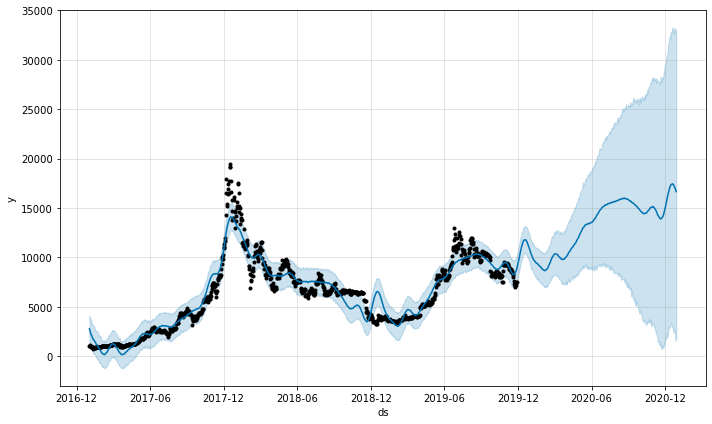

In [34]:
train = df[:1061]
valid = df[1061:]

from fbprophet import Prophet

#fit the model
m = Prophet(weekly_seasonality=True)
m.fit(train)

#predictions
close_prices = m.make_future_dataframe(periods=len(valid))
prediction = m.predict(close_prices)


m.plot(prediction);

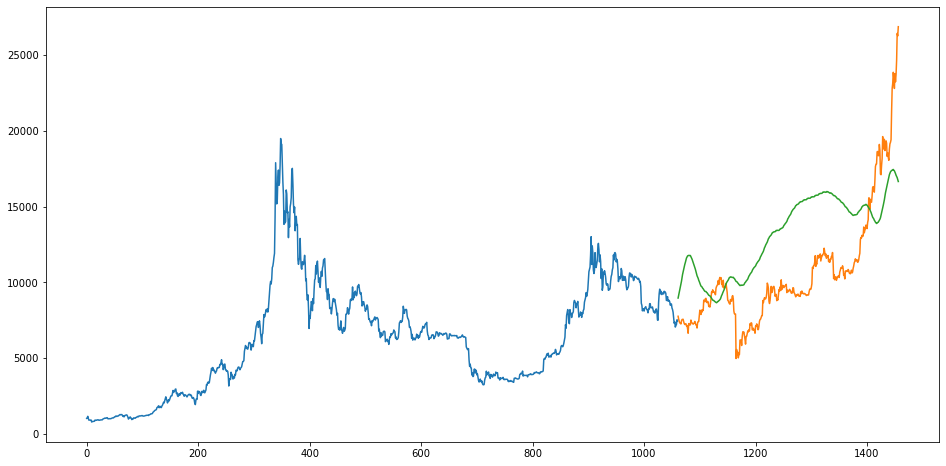

In [36]:
forecast_valid = prediction['yhat'][1061:]
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.figure(figsize=(16,8))
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

By implementing Prophet as time series analysis to predict Bitcoin prices from November 27th, 2019 onwards, it can be noted that Prophet is a tool for which it is not entirely reliable in predicting prices. Yet, of course, future pricing data within stock markets or cryptocurrency is not necessarily defined by past data. As the saying goes: there seem to be correlations, but there is no definite causation.

Nonetheless, Facebook's Prophet is a very useful and effective tool, and it should not be looked down upon just because it does not help predict prices in the future.

Sources:

- https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/#:~:text=Prophet%20is%20an%20open%20source,of%20custom%20seasonality%20and%20holidays!
- https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/